# Individual Assignment

## Question 1:

##### Based on Part A of the case, concisely and in your own words answer the following questions: (i) Given the difference between the M&A context in Europe and the US, which changes does Kusha have to make to her previous headcount reduction methodology (from her consulting days)? (ii) How can she avoid the problem faced in the previous transaction of too many employees leaving without falling afoul of the law?

ANSWER:

The main changes that Kusha has to make to her headcount reduction methodology are mainly:
1. The change from targeting single employees within a company through individual employee scores to a group of employees, since it is not allowed within EU regulations to target single individuals. 
2. The group of employees selected cannot present any discrimination discrepancies, such as by gender, age, religion, etc.
3. The contract termination process should be proceed with caution in order to avoid legislation problems.





In order to prevent the problem that she faced in her previous transaction of having too many employees leaving the company, it is highly recomended to:
1. Use data driven analysis to limit the number of employees that can leave the company and in which positions, in order to avoid massive leave of employees. 
2. Try to be the most accurate possible with the prediction model of the employees who are most likely to leave and offer them the RCC. 
3. To avoid falling afould the law, the variables chosen to build the prediction model must be non-discriminative among different groups of employees. 

In [243]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn import metrics
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import decomposition as dcp
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix

In [244]:
df = pd.read_csv('employee_census_previous_closure.csv')

In [245]:
# Data preprocessing

df.dropna(inplace=True) #drop na
df.set_index('EmployeeNumber', inplace=True) #set the employee number as index

# convert the categorical variables into dummies
df = pd.get_dummies(data=df, columns=['Attrition', 'Department', 'BusinessTravel', 'EducationField','Gender',
'JobLevel','MaritalStatus','OverTime','JobRole','Education','StockOptionLevel'], drop_first=True)

# scaling Variables
df[['DailyRate','MonthlyIncome', 'MonthlyRate']] = preprocessing.scale(df[['DailyRate','MonthlyIncome', 'MonthlyRate']])


# drop the columns that provide the same information
df.drop(columns=['Over18', 'StandardHours','EmployeeCount'], inplace=True)


In [247]:
Y = df["Attrition_Yes"]
X = df.drop(columns=["Attrition_Yes"])

In [248]:
# Verify the correlation betweeen variables of the dataset
corr = df.corr()
corr.style.background_gradient(cmap='coolwarm', axis=None)

mask = np.zeros_like(corr, dtype=bool)
mask[np.triu_indices_from(mask)] = True
corr[mask] = np.nan
(corr
 .style
 .background_gradient(cmap='coolwarm', axis=None, vmin=-1, vmax=1)
 .highlight_null(null_color='#f1f1f1')  # Color NaNs grey
 .set_precision(2))

<ipython-input-248-fa23a7d2fc43>:8: FutureWarning: this method is deprecated in favour of `Styler.format(precision=..)`
  (corr


,Age,DailyRate,DistanceFromHome,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition_Yes,Department_Research & Development,Department_Sales,BusinessTravel_Travel_Frequently,BusinessTravel_Travel_Rarely,EducationField_Life Sciences,EducationField_Marketing,EducationField_Medical,EducationField_Other,EducationField_Technical Degree,Gender_Male,JobLevel_2,JobLevel_3,JobLevel_4,JobLevel_5,MaritalStatus_Married,MaritalStatus_Single,OverTime_Yes,JobRole_Human Resources,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,Education_2,Education_3,Education_4,Education_5,StockOptionLevel_1,StockOptionLevel_2,StockOptionLevel_3
Age,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
DailyRate,0.05,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
DistanceFromHome,-0.02,-0.03,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
EnvironmentSatisfaction,-0.02,-0.00,-0.06,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
HourlyRate,-0.01,0.03,0.03,-0.02,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
JobInvolvement,0.04,0.03,0.04,-0.01,0.02,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
JobSatisfaction,0.02,0.02,0.02,-0.04,-0.08,0.00,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
MonthlyIncome,0.50,0.03,-0.01,-0.00,-0.05,-0.01,-0.00,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
MonthlyRate,0.04,-0.01,0.06,0.05,0.01,-0.05,0.01,0.03,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
NumCompaniesWorked,0.30,0.06,-0.02,-0.00,-0.00,0.03,-0.05,0.14,0.01,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan


## Question 2: 
##### Using Python, complete the prediction task outlined in Part B of the case. In particular, develop a model that allows you to predict the probability of employees at the Lyon facility to accept an RCC if it is offered to them. Make sure that your code prints out the predicted probability for each employee (e.g., as a list). What are the most important factors in determining whether an employee will accept an RCC?


ANSWER:


In order to predict the probability of each employee to accept the RCC,if it is offered to them, we need to firstly fill the NA of the dataset. Otherwise, the analysis would be impossible to proceed. 

Under the consideration of the case, it would not be sensible to drop the NA values, since our main goal is to predict the probability that an employee will leave and by dropping the observation, would be impossible to complete. Another popular way to fill missing values is with the mean of the variable. However, in this case, some variables might be case sensitive and filling with the mean would be inaccurate, such as the age.

Therefore, we have decided to proceed the PCA of the dataset without the NA columns. After obtaining the result of it, we implemented the K-means to divide the individuals into different groups. The main purpose is to identify the cluster that each employee belongs to and fill those NA according to the properties of the cluster.  In this case, the missing values of Age, Distance from Home and Daily Rate are filled with the mean of the cluster, whereas the categorical ones, such as Business Travel and Marital Status are filled with the mode values. After we have fulfilled all the missing values properly, we can proceed with data engineering of the original dataset and predict the probability of leaving for each employee. 

Once we have obtained the list of probabilities, we can also compute which variables have been most relevant when determining if an employee will accept the RCC. In this case, we have run a regression to all the variables in order to see the significance of their p-values. The most relevant factors are the Environment Satisfaction, the Job Involvement and the Job Satisfaction, which have negative relationship with the probability of leaving. Meaning that, the more they are satisfied with the working environment and their involvement, the less likely they will accept the RCC.  Whereas the number of companies worked in his career, the Overtime and the business travel frequency have a positive relationship with the acceptance of RCC. In this case, the more number of companies they have worked, the more overtime they did and the more frequent they travel, the more likely they will accept the RCC.








#### Building Prediction model

In [249]:
from sklearn import decomposition as dcp

In [250]:
# PCA to the dataset 
pca_raw=dcp.PCA(n_components=52)
pca_raw.fit(df)

PCA(n_components=52)

In [251]:
pca_raw.components_ #The loadings

array([[ 1.05283210e-02, -1.66789282e-03, -1.43781356e-02, ...,
         9.82985643e-04, -1.37563340e-03,  2.47844842e-05],
       [ 6.54627590e-01,  2.09911770e-03, -4.78113370e-03, ...,
         6.14635522e-03, -1.07876945e-03, -1.52629476e-03],
       [-5.91969882e-02, -4.56109578e-03,  9.95389394e-01, ...,
        -1.28430686e-03,  2.90304069e-03, -1.02676222e-03],
       ...,
       [ 1.35400026e-05,  3.70332770e-03,  2.60856019e-04, ...,
        -1.86722458e-02, -1.90320790e-02, -1.55177680e-02],
       [ 1.76631704e-04, -5.87029880e-04, -7.51963217e-04, ...,
        -6.80504736e-03, -9.04019872e-03, -1.69455205e-02],
       [-1.30697513e-04,  8.91028392e-05, -1.42763905e-04, ...,
        -6.78255414e-03, -1.32381958e-03, -5.15515773e-03]])

In [252]:
pca_raw.explained_variance_

array([4.22678339e+02, 1.48290420e+02, 6.83180737e+01, 5.16914349e+01,
       1.68862461e+01, 1.34052791e+01, 6.41444847e+00, 5.51811449e+00,
       4.33204948e+00, 3.84867879e+00, 1.58311239e+00, 1.25982832e+00,
       1.16929934e+00, 1.13724770e+00, 9.92257979e-01, 9.60877674e-01,
       6.60073975e-01, 5.21152447e-01, 4.74783167e-01, 4.54967475e-01,
       4.24852997e-01, 3.64861832e-01, 3.31053757e-01, 3.01465242e-01,
       2.37936433e-01, 2.20916532e-01, 2.08899615e-01, 1.96207213e-01,
       1.70838563e-01, 1.63004761e-01, 1.45144166e-01, 1.28376647e-01,
       1.12496826e-01, 9.91019729e-02, 8.45601023e-02, 8.08040789e-02,
       7.59565776e-02, 7.41691988e-02, 6.73984642e-02, 6.17047779e-02,
       5.43085413e-02, 4.73380280e-02, 4.51918145e-02, 4.08770337e-02,
       3.81380672e-02, 2.07837457e-02, 1.66775596e-02, 1.47309929e-02,
       1.11714436e-02, 4.26320632e-03, 2.72313456e-03, 2.45361167e-03])

In [253]:
explained_variance_ratio_cumul_sum=np.cumsum(pca_raw.explained_variance_ratio_) #compute the cumulative sum
explained_variance_ratio_cumul_sum

array([0.56024972, 0.75680502, 0.84735894, 0.91587466, 0.93825696,
       0.95602533, 0.96452753, 0.97184165, 0.97758367, 0.982685  ,
       0.98478338, 0.98645325, 0.98800313, 0.98951052, 0.99082574,
       0.99209936, 0.99297427, 0.99366504, 0.99429436, 0.9948974 ,
       0.99546054, 0.99594415, 0.99638296, 0.99678254, 0.99709792,
       0.99739074, 0.99766763, 0.9979277 , 0.99815414, 0.9983702 ,
       0.99856258, 0.99873274, 0.99888186, 0.99901321, 0.99912529,
       0.9992324 , 0.99933308, 0.99943139, 0.99952072, 0.99960251,
       0.99967449, 0.99973724, 0.99979714, 0.99985132, 0.99990187,
       0.99992942, 0.99995153, 0.99997105, 0.99998586, 0.99999151,
       0.99999512, 0.99999837])

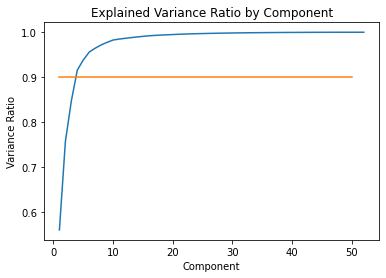

In [254]:
plt.title("Explained Variance Ratio by Component")
plt.plot(np.arange(1,53),explained_variance_ratio_cumul_sum) #so that the first component is at 1, not 0
plt.plot([1,50],[0.9,0.9])
plt.xlabel("Component")
plt.ylabel("Variance Ratio")
plt.show()

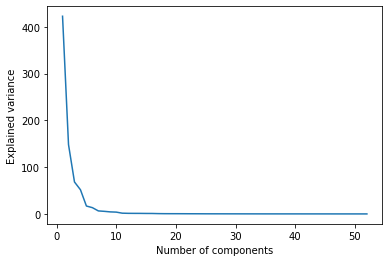

In [255]:
plt.plot(np.arange(1,53),pca_raw.explained_variance_)
plt.xlabel("Number of components")
plt.ylabel("Explained variance")
plt.show()

In [256]:
# Loadings
loadings=pd.DataFrame(pca_raw.components_[0:4,:].T).set_index(np.arange(1,54))
loadings.columns = ['z1','z2','z3','z4']
loadings.index = df.columns

,z1,z2,z3,z4
Age,0.010528,0.654628,-0.059197,0.592722
DailyRate,-0.001668,0.002099,-0.004561,0.009113
DistanceFromHome,-0.014378,-0.004781,0.995389,0.085970
EnvironmentSatisfaction,0.001122,-0.000807,-0.008320,-0.005361
HourlyRate,-0.998802,0.038635,-0.012088,-0.025712
JobInvolvement,-0.000815,0.000209,0.003179,0.005938
JobSatisfaction,0.004262,0.000920,0.003177,0.001943
MonthlyIncome,0.003250,0.058009,0.000564,-0.015396
MonthlyRate,-0.000575,0.002441,0.006434,0.006109
NumCompaniesWorked,0.000438,0.046682,-0.014219,0.123936


In [257]:
pca_sparse=dcp.SparsePCA(alpha=5,n_components=4) #To explain better of the variables in the new dataset
pca_sparse.fit(df)
loadings_sparse=pd.DataFrame(pca_sparse.components_.T).set_index(np.arange(1,54))
loadings_sparse.columns = ['z1','z2','z3','z4']
loadings_sparse.index = df.columns

,z1,z2,z3,z4
Age,0.0,0.869164,0.0,0.000000
DailyRate,0.0,0.000000,0.0,0.000000
DistanceFromHome,0.0,0.000000,1.0,0.000000
EnvironmentSatisfaction,0.0,0.000000,0.0,0.000000
HourlyRate,1.0,0.000000,0.0,0.000000
JobInvolvement,0.0,0.000000,0.0,0.000000
JobSatisfaction,0.0,0.000000,0.0,0.000000
MonthlyIncome,0.0,0.029937,0.0,0.036449
MonthlyRate,0.0,0.000000,0.0,0.000000
NumCompaniesWorked,0.0,0.078157,0.0,-0.031667


In [258]:
data_pca1 = pca_raw.fit_transform(df)
df_pca1=pd.DataFrame()
df_pca1["Variable1"]=data_pca1[:, 0].reshape(-1)
df_pca1["Variable2"]=data_pca1[:, 1].reshape(-1)
df_pca1["Variable3"]=data_pca1[:, 2].reshape(-1)
df_pca1["Variable4"]=data_pca1[:, 3].reshape(-1)

In [259]:
logm = LogisticRegression(max_iter=1000)
# Fit a logistic regression with vector Y as dependent and matrix X as independent
logm.fit(df_pca1, Y.values.ravel())
print(logm.intercept_)
print(logm.coef_)

[-1.78060123]
[[-0.00478499 -0.05692555  0.01366169  0.02406136]]


In [260]:
logm.predict_proba(df_pca1)
Y_probs = logm.predict_proba(df_pca1)[:, 1]

#### Fill NA process to the dataset

In [261]:
df_raw = pd.read_csv('employee_census_lyon.csv').iloc[:,:47]
df_ = df_raw.copy()

In [262]:
df_.set_index('EmployeeNumber', inplace=True)
# df_.dropna(axis=1, inplace=True) #drop na columns

# convert the categorical variables into dummies
df_ = pd.get_dummies(data=df_, columns=['EducationField','Gender','Department',
'JobLevel','OverTime','JobRole','Education','StockOptionLevel'], drop_first=True)

# scaling Variables
df_[['MonthlyIncome', 'MonthlyRate']] = preprocessing.scale(df_[['MonthlyIncome', 'MonthlyRate']])


# drop the columns that provide the same information
df_.drop(columns=['Over18', 'StandardHours','EmployeeCount'], axis=1,inplace=True)

# drop the columns with NAs to apply PCA 
df_.drop(columns=['Age', 'BusinessTravel','DailyRate', 'DistanceFromHome','MaritalStatus'], axis=1,inplace=True)



In [263]:
pca=dcp.PCA(n_components=45) #number of components we keep: here we have three features and we are asking for three new variables out of the old variables
pca.fit(df_)

PCA(n_components=45)

In [264]:
pca.components_ #The loadings

array([[-3.69404204e-03,  9.99695091e-01,  1.73285808e-03, ...,
         1.32779060e-03,  9.48998865e-04,  4.75305089e-04],
       [-1.51563973e-03, -2.02422174e-02, -3.32198501e-03, ...,
         2.94247287e-03, -4.45409697e-04,  3.11306578e-04],
       [ 5.16915482e-03, -6.34458029e-03, -1.07778734e-03, ...,
        -2.19212393e-03, -2.91866582e-03,  2.16827841e-03],
       ...,
       [-6.68525197e-04, -2.12747216e-05, -2.92122200e-03, ...,
         3.12858184e-03,  7.63184912e-03, -4.89451096e-02],
       [-1.89025526e-03, -1.98393940e-04,  3.15556324e-03, ...,
        -2.73919686e-03,  2.16190107e-02,  6.94259387e-03],
       [-1.06067426e-03,  1.95162788e-04,  2.16793744e-03, ...,
        -1.15198153e-03, -7.26171223e-03, -1.86253375e-02]])

In [265]:
pca.explained_variance_

array([3.95778719e+02, 9.77080272e+01, 2.49672196e+01, 1.33545975e+01,
       6.11031811e+00, 5.51463839e+00, 4.43308693e+00, 3.20399601e+00,
       1.68540803e+00, 1.29743718e+00, 1.19984400e+00, 1.05580024e+00,
       9.94936757e-01, 6.84915775e-01, 5.35034090e-01, 4.89250294e-01,
       4.50962846e-01, 3.62386184e-01, 3.19366638e-01, 2.54937974e-01,
       2.44823972e-01, 2.36031476e-01, 2.12567708e-01, 1.79181923e-01,
       1.68801198e-01, 1.37469840e-01, 1.27793928e-01, 9.30099481e-02,
       8.29463171e-02, 7.67890309e-02, 6.51490266e-02, 5.64932928e-02,
       4.61347554e-02, 4.30070441e-02, 3.90234986e-02, 3.79158267e-02,
       3.30064589e-02, 2.79695991e-02, 1.53874714e-02, 1.35277986e-02,
       9.16025343e-03, 3.55236649e-03, 2.76566872e-03, 2.57566201e-03,
       1.33085918e-03])

In [266]:
explained_variance_ratio_cumul_sum=np.cumsum(pca.explained_variance_ratio_) #compute the cumulative sum
explained_variance_ratio_cumul_sum

array([0.70378516, 0.87753239, 0.92192983, 0.94567736, 0.9565429 ,
       0.96634919, 0.97423223, 0.97992967, 0.98292671, 0.98523385,
       0.98736745, 0.98924491, 0.99101413, 0.99223207, 0.99318348,
       0.99405348, 0.9948554 , 0.9954998 , 0.99606771, 0.99652105,
       0.9969564 , 0.99737612, 0.99775411, 0.99807274, 0.99837291,
       0.99861736, 0.9988446 , 0.99901   , 0.9991575 , 0.99929404,
       0.99940989, 0.99951035, 0.99959239, 0.99966887, 0.99973826,
       0.99980568, 0.99986438, 0.99991411, 0.99994147, 0.99996553,
       0.99998182, 0.99998814, 0.99999305, 0.99999763, 1.        ])

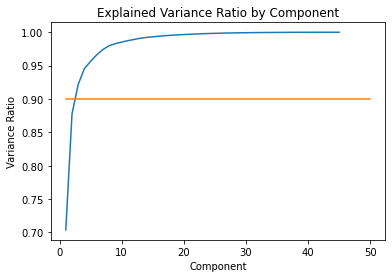

In [267]:
plt.title("Explained Variance Ratio by Component")
plt.plot(np.arange(1,46),explained_variance_ratio_cumul_sum) #so that the first component is at 1, not 0
plt.plot([1,50],[0.9,0.9])
plt.xlabel("Component")
plt.ylabel("Variance Ratio")
plt.show()

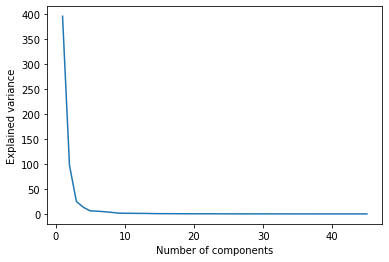

In [268]:
plt.plot(np.arange(1,46),pca.explained_variance_)
plt.xlabel("Number of components")
plt.ylabel("Explained variance")
plt.show()

In [269]:
# Loadings
loadings=pd.DataFrame(pca.components_[0:3,:].T).set_index(np.arange(1,46))
loadings.columns = ['z1','z2','z3']
loadings.index = df_.columns

,z1,z2,z3
EnvironmentSatisfaction,-0.003694,-0.001516,0.005169
HourlyRate,0.999695,-0.020242,-0.006345
JobInvolvement,0.001733,-0.003322,-0.001078
JobSatisfaction,-0.001139,-0.002236,-0.001230
MonthlyIncome,0.002058,0.069019,0.073205
MonthlyRate,-0.002565,-0.000421,0.021085
NumCompaniesWorked,0.007587,-0.000657,0.238395
PercentSalaryHike,-0.005204,-0.035184,-0.027039
PerformanceRating,-0.000137,-0.000327,-0.006370
RelationshipSatisfaction,0.002580,0.001270,0.007994


In [270]:
pca_sparse=dcp.SparsePCA(alpha=5,n_components=3) #To explain better of the variables in the new dataset
pca_sparse.fit(df_)
loadings_sparse=pd.DataFrame(pca_sparse.components_.T).set_index(np.arange(1,46))
loadings_sparse.columns = ['z1','z2','z3']
loadings_sparse.index = df_.columns

,z1,z2,z3
EnvironmentSatisfaction,0.0,0.000000,0.000000
HourlyRate,1.0,0.000000,0.000000
JobInvolvement,0.0,0.000000,0.000000
JobSatisfaction,0.0,0.000000,0.000000
MonthlyIncome,0.0,0.000000,0.072013
MonthlyRate,0.0,0.000000,0.000000
NumCompaniesWorked,0.0,-0.087089,0.080027
PercentSalaryHike,0.0,0.000000,-0.009048
PerformanceRating,0.0,0.000000,0.000000
RelationshipSatisfaction,0.0,0.000000,0.000000


In [271]:
data_pca = pca.fit_transform(df_)
df_pca=pd.DataFrame()
df_pca["Variable1"]=data_pca[:, 0].reshape(-1)
df_pca["Variable2"]=data_pca[:, 1].reshape(-1)
df_pca["Variable3"]=data_pca[:, 2].reshape(-1)

#### K-means to divide employees into 2 clusters

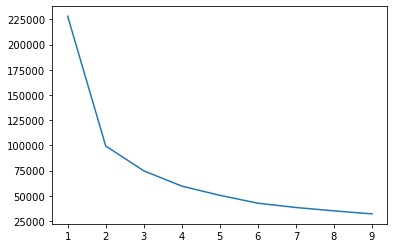

In [272]:
from sklearn.cluster import KMeans
inertia_K=[]
K = range(1,10)
for k in K:
    kmeanModel = KMeans(n_clusters=k, random_state=1)
    kmeanModel.fit(df_pca)
    inertia_K.append(kmeanModel.inertia_)
plt.plot(K,inertia_K)
plt.show()

In [273]:
# the 2 employees cluster
kmeans = KMeans(n_clusters=2, random_state=1).fit(df_pca)
kmeans.labels_

array([0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1,
       0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1,
       0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0,
       1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1,
       0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1,
       1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0,
       1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1,
       0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1,
       1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0,
       1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1,
       1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0,

In [274]:
kmeans.cluster_centers_

array([[ 18.41707482,  -0.05970498,   0.03373421],
       [-15.852672  ,   0.05139163,  -0.02903704]])

In [275]:
# Append the list of cluster to the df_raw in order to fill the NA
k_list = list(kmeans.labels_)
df_raw['cluster'] = k_list

In [276]:
cluster = df_raw.groupby('cluster')
cluster_group = cluster.mean()

In [277]:
cluster_group

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
cluster,,,,,,,,,,,,,,,,,,,,,
0,38.305556,785.862944,10.316092,2.995098,1.0,1060.573529,2.754902,82.460784,2.833333,2.147059,...,2.803922,80.0,0.813725,11.750000,2.799020,2.808824,7.318627,4.132353,2.622549,4.352941
1,37.733010,813.891304,8.760563,2.932489,1.0,996.291139,2.860759,48.202532,2.713080,2.080169,...,2.729958,80.0,0.654008,11.236287,2.873418,2.776371,7.025316,4.371308,2.109705,4.434599


In [278]:
from collections import Counter

Index(['Age', 'BusinessTravel', 'DailyRate', 'Department', 'DistanceFromHome',
       'Education', 'EducationField', 'EmployeeCount', 'EmployeeNumber',
       'EnvironmentSatisfaction', 'Gender', 'HourlyRate', 'JobInvolvement',
       'JobLevel', 'JobRole', 'JobSatisfaction', 'MaritalStatus',
       'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'Over18',
       'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager', 'cluster'],
      dtype='object')

#### Fill the NA with the result onbtained from PCA and K-means

In [279]:
Counter(list(df_raw['BusinessTravel']))

Counter({'Travel_Rarely': 311,
         'Non-Travel': 48,
         'Travel_Frequently': 77,
         nan: 5})

In [280]:
Counter(list(df_raw['MaritalStatus']))

Counter({'Single': 150, 'Divorced': 95, 'Married': 193, nan: 3})

In [281]:
# fill na of the dataset with the values we obtained in k-means
df_raw['BusinessTravel'].fillna('Travel_Rarely', inplace=True)
df_raw['MaritalStatus'].fillna('Married', inplace=True)

df_raw.loc[(df_raw['cluster'] == 0),'DailyRate'] = df_raw.loc[(df_raw['cluster'] == 0),'DailyRate'].fillna(value=round(cluster_group.loc[0,'DailyRate']))
df_raw.loc[(df_raw['cluster'] == 1),'DailyRate'] = df_raw.loc[(df_raw['cluster'] == 1),'DailyRate'].fillna(value=round(cluster_group.loc[1,'DailyRate']))
df_raw.loc[(df_raw['cluster'] == 0),'DistanceFromHome'] = df_raw.loc[(df_raw['cluster'] == 0),'DistanceFromHome'].fillna(value=round(cluster_group.loc[0,'DistanceFromHome']))
df_raw.loc[(df_raw['cluster'] == 1),'DistanceFromHome'] = df_raw.loc[(df_raw['cluster'] == 1),'DistanceFromHome'].fillna(value=round(cluster_group.loc[1,'DistanceFromHome']))

# fill na of age
df_raw.loc[(df_raw['cluster'] == 0),'Age'] = df_raw.loc[(df_raw['cluster'] == 0),'Age'].fillna(value=round(cluster_group.loc[0,'Age']))
df_raw.loc[(df_raw['cluster'] == 1),'Age'] = df_raw.loc[(df_raw['cluster'] == 1),'Age'].fillna(value=round(cluster_group.loc[1,'Age']))


##### Data preprocessing and cleaning with the whole dataset (without NAs)

In [282]:
df_raw.set_index('EmployeeNumber', inplace=True) #set the employee number as index

# convert the categorical variables into dummies
df_raw = pd.get_dummies(data=df_raw, columns=['Department', 'BusinessTravel', 'EducationField','Gender',
'JobLevel','MaritalStatus','OverTime','JobRole','Education','StockOptionLevel'], drop_first=True)

# scaling Variables
df_raw[['MonthlyIncome', 'MonthlyRate']] = preprocessing.scale(df_raw[['MonthlyIncome', 'MonthlyRate']])


# drop the columns that provide the same information
df_raw.drop(columns=['Over18', 'StandardHours','EmployeeCount','cluster'], inplace=True)


In [283]:
# PCA of df_raw to do logistic regression 
data_pca = pca_raw.fit_transform(df_raw)
df_pca=pd.DataFrame()
df_pca["Variable1"]=data_pca[:, 0].reshape(-1)
df_pca["Variable2"]=data_pca[:, 1].reshape(-1)
df_pca["Variable3"]=data_pca[:, 2].reshape(-1)
df_pca["Variable4"]=data_pca[:, 3].reshape(-1)

#### Prediction of the model

In [284]:
# Probability of each employee to leave the company. 
Y_probs = logm.predict_proba(df_pca)[:,1]

In [285]:
Y_probs

array([3.59968434e-02, 7.20450218e-02, 7.86562246e-01, 1.79502202e-02,
       1.09601513e-02, 9.54891726e-01, 9.34763799e-01, 1.01493897e-03,
       7.85466557e-02, 8.89662148e-02, 5.97655898e-03, 5.14146013e-01,
       4.53570933e-01, 7.70998152e-02, 2.56155554e-01, 4.98598908e-03,
       3.12375695e-01, 3.22310262e-01, 1.18042435e-01, 1.00937556e-01,
       6.20673164e-01, 6.05359252e-02, 5.24464815e-02, 8.35385258e-01,
       4.86997355e-02, 2.98929856e-01, 1.28251947e-01, 4.88651104e-01,
       2.04643112e-02, 1.79732391e-01, 7.31290692e-01, 2.03917353e-01,
       4.10005953e-01, 1.58550307e-01, 1.18729547e-03, 2.24541904e-02,
       8.30165938e-01, 2.81960940e-02, 1.63976062e-02, 1.47166746e-02,
       2.33769624e-01, 3.25848911e-02, 2.09968025e-02, 7.49028403e-02,
       8.80009254e-01, 4.79235910e-02, 7.97701420e-01, 7.77955384e-01,
       5.76662923e-01, 7.65383623e-02, 1.16409447e-01, 6.67003991e-02,
       4.36927674e-01, 4.03405607e-01, 1.15822274e-01, 4.91060708e-02,
      

#### Test the significance of the variables

In [286]:
# use regression to verify which variables are the most relevant ones for the prediction
import statsmodels.api as sm
X = df.drop(columns=['Attrition_Yes'])
Y = df[['Attrition_Yes']]

X = sm.add_constant(X) # In this package, by default, the regression will have no intercept, hence we need to manually add it to the X matrix, and call the result X_sm
lm = sm.OLS(Y, X).fit() # Fit an OLS with vector Y as dependent and matrix X_sm as independent
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:          Attrition_Yes   R-squared:                       0.307
Model:                            OLS   Adj. R-squared:                  0.257
Method:                 Least Squares   F-statistic:                     6.157
Date:                Wed, 15 Dec 2021   Prob (F-statistic):           7.05e-32
Time:                        18:20:04   Log-Likelihood:                -189.69
No. Observations:                 775   AIC:                             485.4
Df Residuals:                     722   BIC:                             732.0
Df Model:                          52                                         
Covariance Type:            nonrobust                                         
                                        coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
const 

## Question 3: 

##### Formulate the problem outlined in Part C of the case as an optimization problem. Be sure to clarify what are the key elements of the problem as learned in class.

ANSWER:

The formulation of optimization problem according to the different key variables are:

1. Decision variables:
- Which employee category we should give the RCC to. 

2. Objective: 
- Minimize the cost of the severance package.

3. Constraints: 
- The total saving should be greater than 3 millions of euros. 
- The people who leave are spread across job roles and departments. 
- The number of people we want to see leaving should be greater than 40. 
- There should be a minimum number of employees in each department, which means that the employees who leave should be proportional to the number of employees in each department, or maintain the same or within 2 to 5% of tolerance. 


## Question 4:
##### Open Starting_model.xlsx. Each employee is given with a probability of accepting an RCC (please use this probability, not the one you predicted). Determine employee categories which may or may not be opened up to RCCs. In the xlsx file, employees have been assigned at random to placeholder categories - make sure to overwrite the group assignments based on your choices and modify the optimization problem accordingly. Moreover, make sure to justify your choice of employee categories, especially in light of possible discrimination issues.

ANSWER:

When processing with the classification of employees to different categories, we have decided to drop those variables that might create discrimination issues while clustering, such as gender, age, education, etc, in order to ensure that they will not affect on the classification process. 


In terms of the data processing, we followed similar steps to the ones taken in the previous section. Apart from dropping the possible discriminative variables, we have also dropped the Department column, since its information overlaps with the columns Flag Sales, HR and R&D. The processing of filling the missing values remained the same as the one taken previously. 

Once we have the dataset ready, we will proceed with the PCA and K-means in order to divide the different clusters of the company and we will overwrite the results to the corresponding columns of the excel file for future uses. 


In [287]:
df_start = pd.read_excel('Starting_model.xlsx', index_col= 'Unnamed: 0').iloc[:,:47]

In [288]:
df_ori = df_start.copy()

#### Preprocessing to fill the NA values of the dataset

In [289]:
df_start.set_index('EmployeeNumber', inplace=True)
df_start.dropna(axis=1, inplace=True) #drop na

# convert the categorical variables into dummies
df_start = pd.get_dummies(data=df_start, columns=['EducationField','Gender',
'JobLevel','OverTime','JobRole','Education','StockOptionLevel'], drop_first=True)

# scaling Variables
df_start[['MonthlyIncome', 'MonthlyRate']] = preprocessing.scale(df_start[['MonthlyIncome', 'MonthlyRate']])


# drop the columns that provide the same information
df_start.drop(columns=['Over18', 'StandardHours','EmployeeCount','Department'], inplace=True)


In [290]:
df_start.isna().any()

Flag Sales                         False
Flag HR                            False
Flag R&D                           False
EnvironmentSatisfaction            False
HourlyRate                         False
JobInvolvement                     False
Healthcare Representative Flag     False
Human Resources Flag               False
Laboratory Technician Flag         False
Manager                            False
Manufacturing Director             False
Research Director                  False
Research Scientist                 False
Sales Executive                    False
Sales Representative               False
JobSatisfaction                    False
MonthlyIncome                      False
MonthlyRate                        False
NumCompaniesWorked                 False
PercentSalaryHike                  False
PerformanceRating                  False
RelationshipSatisfaction           False
TotalWorkingYears                  False
TrainingTimesLastYear              False
WorkLifeBalance 

In [291]:
df_start.columns

Index(['Flag Sales', 'Flag HR', 'Flag R&D', 'EnvironmentSatisfaction',
       'HourlyRate', 'JobInvolvement', 'Healthcare Representative Flag',
       'Human Resources Flag', 'Laboratory Technician Flag', 'Manager',
       'Manufacturing Director', 'Research Director', 'Research Scientist',
       'Sales Executive', 'Sales Representative', 'JobSatisfaction',
       'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager', 'Prob (take RCC)',
       'EducationField_Life Sciences', 'EducationField_Marketing',
       'EducationField_Medical', 'EducationField_Other',
       'EducationField_Technical Degree', 'Gender_Male', 'JobLevel_2',
       'JobLevel_3', 'JobLevel_4', 'JobLevel_5', 'OverTime_Yes',
       'JobRole_Human Resources', 'JobRole_La

In [292]:
pca=dcp.PCA(n_components=56) #number of components we keep: here we have three features and we are asking for three new variables out of the old variables
pca.fit(df_start)
pca.components_ #The loadings


array([[ 4.69512881e-04, -9.60600453e-04,  4.91087571e-04, ...,
         1.32788221e-03,  9.48974424e-04,  4.75326144e-04],
       [ 2.03776270e-03, -2.79343423e-04, -1.75841928e-03, ...,
         2.94241365e-03, -4.44602372e-04,  3.11676821e-04],
       [-3.62849704e-03, -6.29576857e-04,  4.25807390e-03, ...,
        -2.19205439e-03, -2.91684202e-03,  2.16963574e-03],
       ...,
       [ 0.00000000e+00,  1.40599338e-15,  3.71853284e-16, ...,
         2.49800181e-16, -1.09287579e-16, -2.35922393e-16],
       [ 0.00000000e+00, -1.29058006e-15, -5.33370217e-16, ...,
        -2.77555756e-17, -7.97972799e-17,  6.59194921e-17],
       [ 0.00000000e+00,  4.33680869e-17, -2.10334513e-17, ...,
         2.08166817e-16,  2.91433544e-16, -4.33680869e-17]])

In [293]:
pca.explained_variance_

array([3.95780078e+02, 9.77373210e+01, 2.49748349e+01, 1.33569778e+01,
       6.11346566e+00, 5.52448224e+00, 4.43671169e+00, 3.20559190e+00,
       1.68602258e+00, 1.30105090e+00, 1.20049349e+00, 1.06036078e+00,
       1.02027661e+00, 8.56713960e-01, 5.38494470e-01, 4.99333214e-01,
       4.84474455e-01, 3.78417831e-01, 3.56730663e-01, 3.21197621e-01,
       2.90918910e-01, 2.49080582e-01, 2.44551897e-01, 2.22060932e-01,
       1.81317147e-01, 1.79477822e-01, 1.60840107e-01, 1.37064055e-01,
       1.31655624e-01, 1.07424696e-01, 8.63804120e-02, 8.22569623e-02,
       7.54981199e-02, 5.45624556e-02, 4.31481913e-02, 4.21590053e-02,
       4.02571770e-02, 3.20173335e-02, 2.95696025e-02, 2.02503235e-02,
       1.37473198e-02, 1.06333921e-02, 8.46791001e-03, 5.23702784e-03,
       2.65666436e-03, 1.91912771e-03, 3.41077366e-30, 2.43464846e-30,
       2.43464846e-30, 2.43464846e-30, 2.43464846e-30, 2.43464846e-30,
       2.43464846e-30, 2.43464846e-30, 2.43464846e-30, 2.43464846e-30])

In [294]:
explained_variance_ratio_cumul_sum=np.cumsum(pca.explained_variance_ratio_) #compute the cumulative sum

In [295]:
explained_variance_ratio_cumul_sum

array([0.702627  , 0.87613972, 0.92047746, 0.94419005, 0.95504327,
       0.96485086, 0.97272734, 0.97841822, 0.98141141, 0.98372116,
       0.98585239, 0.98773485, 0.98954614, 0.99106706, 0.99202305,
       0.99290951, 0.9937696 , 0.9944414 , 0.99507471, 0.99564493,
       0.99616139, 0.99660359, 0.99703774, 0.99743196, 0.99775385,
       0.99807248, 0.99835802, 0.99860135, 0.99883508, 0.99902579,
       0.99917914, 0.99932517, 0.9994592 , 0.99955606, 0.99963266,
       0.99970751, 0.99977898, 0.99983582, 0.99988831, 0.99992426,
       0.99994867, 0.99996755, 0.99998258, 0.99999188, 0.99999659,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        ])

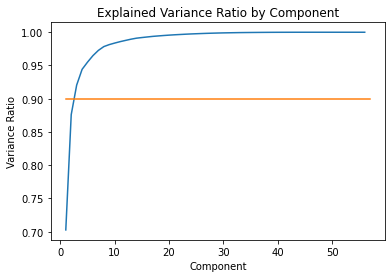

In [296]:
plt.title("Explained Variance Ratio by Component")
plt.plot(np.arange(1,57),explained_variance_ratio_cumul_sum) #so that the first component is at 1, not 0
plt.plot([1,57],[0.90,0.90])
plt.xlabel("Component")
plt.ylabel("Variance Ratio")
plt.show()

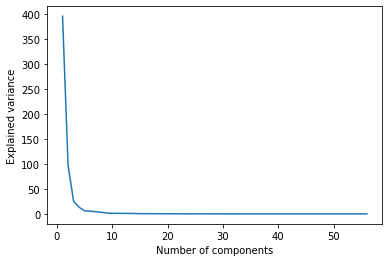

In [297]:
plt.plot(np.arange(1,57),pca.explained_variance_)
plt.xlabel("Number of components")
plt.ylabel("Explained variance")
plt.show()

In [298]:
loadings=pd.DataFrame(pca.components_[0:3,:].T).set_index(np.arange(1,57))
loadings.columns = ['z1','z2','z3']
loadings.index = df_start.columns

,z1,z2,z3
Flag Sales,0.000470,0.002038,-0.003628
Flag HR,-0.000961,-0.000279,-0.000630
Flag R&D,0.000491,-0.001758,0.004258
EnvironmentSatisfaction,-0.003694,-0.001511,0.005171
HourlyRate,0.999693,-0.020258,-0.006343
JobInvolvement,0.001733,-0.003321,-0.001069
Healthcare Representative Flag,0.000649,0.004268,0.003033
Human Resources Flag,-0.000840,-0.001554,-0.000124
Laboratory Technician Flag,0.000108,-0.007027,-0.005565
Manager,0.000660,0.011128,0.008392


In [300]:
data_pca = pca.fit_transform(df_start)
df_pca=pd.DataFrame()
df_pca["Variable1"]=data_pca[:, 0].reshape(-1)
df_pca["Variable2"]=data_pca[:, 1].reshape(-1)
df_pca["Variable3"]=data_pca[:, 2].reshape(-1)

In [301]:
df_pca

,Variable1,Variable2,Variable3
0,19.774465,-6.240128,-2.822476
1,-7.198799,-7.264135,-1.847764
2,-6.316120,-13.336338,-1.510702
3,-4.925027,2.939449,15.278210
4,-1.875087,8.971346,-1.491697
...,...,...,...
436,-10.233775,-7.281274,-2.296603
437,8.815246,-5.548070,-2.923599
438,19.810060,-8.524405,-0.612011
439,-22.006704,-0.367148,4.211738


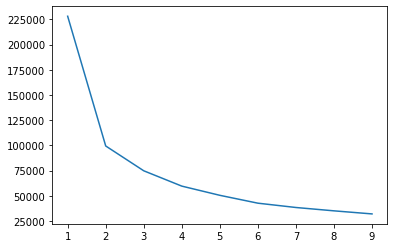

In [302]:
inertia_K=[]
K = range(1,10)
for k in K:
    kmeanModel = KMeans(n_clusters=k, random_state=1)
    kmeanModel.fit(df_pca)
    inertia_K.append(kmeanModel.inertia_)
plt.plot(K,inertia_K)
plt.show()

In [303]:
kmeans = KMeans(n_clusters=2, random_state=1).fit(df_pca)
kmeans.labels_

array([0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1,
       0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1,
       0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0,
       1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1,
       0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1,
       1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0,
       1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1,
       0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1,
       1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0,
       1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1,
       1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0,

In [304]:
kmeans.cluster_centers_

array([[ 18.41713284,  -0.05974404,   0.03365381],
       [-15.85272194,   0.05142525,  -0.02896784]])

In [305]:
k_list = list(kmeans.labels_)
df_ori['cluster'] = k_list

In [306]:
df_ori.T

Unnamed: 0,0,1,2,3,4,5,6,7,8,9,...,431,432,433,434,435,436,437,438,439,440
Age,NaN,53.0,24.0,45.0,36.0,34.0,NaN,39.0,45.0,NaN,...,54.0,37.0,33.0,50.0,49.0,33.0,27.0,NaN,39.0,NaN
BusinessTravel,Travel_Rarely,Travel_Rarely,Travel_Rarely,Travel_Rarely,Travel_Rarely,Travel_Rarely,Travel_Rarely,Travel_Rarely,Non-Travel,Travel_Rarely,...,Travel_Rarely,Non-Travel,Non-Travel,Travel_Rarely,Travel_Rarely,Travel_Frequently,Non-Travel,Travel_Rarely,Travel_Rarely,Travel_Rarely
DailyRate,866.0,1084.0,240.0,1339.0,1396.0,204.0,144.0,1431.0,1052.0,1229.0,...,376.0,1413.0,NaN,410.0,470.0,430.0,210.0,1157.0,1383.0,104.0
Department,Sales,Research & Development,Human Resources,Research & Development,Research & Development,Sales,Research & Development,Research & Development,Sales,Research & Development,...,Research & Development,Research & Development,Sales,Sales,Research & Development,Sales,Sales,Research & Development,Human Resources,Research & Development
Flag Sales,1,0,0,0,0,1,0,0,1,0,...,0,0,1,1,0,1,1,0,0,0
Flag HR,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
Flag R&D,0,1,0,1,1,0,1,1,0,1,...,1,1,0,0,1,0,0,1,0,1
DistanceFromHome,NaN,13.0,22.0,7.0,NaN,14.0,22.0,1.0,6.0,8.0,...,19.0,NaN,8.0,28.0,20.0,7.0,1.0,2.0,2.0,2.0
Education,3,2,1,3,2,3,3,4,3,1,...,4,2,1,3,4,3,1,4,3,3
EducationField,Medical,Medical,Human Resources,Life Sciences,Life Sciences,Technical Degree,Life Sciences,Medical,Medical,Life Sciences,...,Medical,Technical Degree,Life Sciences,Marketing,Medical,Medical,Marketing,Medical,Life Sciences,Life Sciences


In [307]:
# cluster1 = df_ori.groupby('cluster')
clus_group= cluster.mean()

In [308]:
from collections import Counter
df_ori.columns

Index(['Age', 'BusinessTravel', 'DailyRate', 'Department', 'Flag Sales',
       'Flag HR', 'Flag R&D', 'DistanceFromHome', 'Education',
       'EducationField', 'EmployeeCount', 'EmployeeNumber',
       'EnvironmentSatisfaction', 'Gender', 'HourlyRate', 'JobInvolvement',
       'JobLevel', 'JobRole', 'Healthcare Representative Flag',
       'Human Resources Flag', 'Laboratory Technician Flag', 'Manager',
       'Manufacturing Director', 'Research Director', 'Research Scientist',
       'Sales Executive', 'Sales Representative', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager', 'Prob (take RCC)', 'cluster'],
      dtype='objec

In [309]:
clus_group

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
cluster,,,,,,,,,,,,,,,,,,,,,
0,38.305556,785.862944,10.316092,2.995098,1.0,1060.573529,2.754902,82.460784,2.833333,2.147059,...,2.803922,80.0,0.813725,11.750000,2.799020,2.808824,7.318627,4.132353,2.622549,4.352941
1,37.733010,813.891304,8.760563,2.932489,1.0,996.291139,2.860759,48.202532,2.713080,2.080169,...,2.729958,80.0,0.654008,11.236287,2.873418,2.776371,7.025316,4.371308,2.109705,4.434599


In [310]:
Counter(list(df_ori['BusinessTravel']))

Counter({'Travel_Rarely': 311,
         'Non-Travel': 48,
         'Travel_Frequently': 77,
         nan: 5})

In [311]:
Counter(list(df_ori['MaritalStatus']))

Counter({'Single': 150, 'Divorced': 95, 'Married': 193, nan: 3})

#### Filling the NAs with the values obtained

In [312]:
# fill na of the dataset with the values we obtained in k-means
df_ori['BusinessTravel'].fillna('Travel_Rarely', inplace=True)
df_ori['MaritalStatus'].fillna('Married', inplace=True)

df_ori.loc[(df_ori['cluster'] == 0),'DailyRate'] = df_ori.loc[(df_ori['cluster'] == 0),'DailyRate'].fillna(value=round(clus_group.loc[0,'DailyRate']))
df_ori.loc[(df_ori['cluster'] == 1),'DailyRate'] = df_ori.loc[(df_ori['cluster'] == 1),'DailyRate'].fillna(value=round(clus_group.loc[1,'DailyRate']))


df_ori.loc[(df_ori['cluster'] == 0),'DistanceFromHome'] = df_ori.loc[(df_ori['cluster'] == 0),'DistanceFromHome'].fillna(value=round(clus_group.loc[0,'DistanceFromHome']))
df_ori.loc[(df_ori['cluster'] == 1),'DistanceFromHome'] = df_ori.loc[(df_ori['cluster'] == 1),'DistanceFromHome'].fillna(value=round(clus_group.loc[1,'DistanceFromHome']))


# fill na of age
df_ori.loc[(df_ori['cluster'] == 0),'Age'] = df_ori.loc[(df_ori['cluster'] == 0),'Age'].fillna(value=round(clus_group.loc[0,'Age']))
df_ori.loc[(df_ori['cluster'] == 1),'Age'] = df_ori.loc[(df_ori['cluster'] == 1),'Age'].fillna(value=round(clus_group.loc[1,'Age']))


#### Data preprocessing after filling NAs

In [313]:
# convert the categorical variables into dummies
df_ori = pd.get_dummies(data=df_ori, columns=['BusinessTravel', 'EducationField',
'JobLevel','OverTime','JobRole','StockOptionLevel'], drop_first=True)

# scaling Variables
df_ori[['MonthlyIncome', 'MonthlyRate']] = preprocessing.scale(df_ori[['MonthlyIncome', 'MonthlyRate']])


# drop the columns that provide the same information
df_ori.drop(columns=['Over18', 'StandardHours','EmployeeCount', 'Department','cluster','Flag Sales'], inplace=True)

#remove the columns that discriminates
df_ori.drop(columns=['Age','MaritalStatus','Gender','Education'], inplace=True)


#### PCA

In [314]:
# PCA
pca2=dcp.PCA(n_components=55) 
pca2.fit(df_ori)

PCA(n_components=55)

In [315]:
df_ori.columns

Index(['DailyRate', 'Flag HR', 'Flag R&D', 'DistanceFromHome',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'HourlyRate',
       'JobInvolvement', 'Healthcare Representative Flag',
       'Human Resources Flag', 'Laboratory Technician Flag', 'Manager',
       'Manufacturing Director', 'Research Director', 'Research Scientist',
       'Sales Executive', 'Sales Representative', 'JobSatisfaction',
       'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager', 'Prob (take RCC)',
       'BusinessTravel_Travel_Frequently', 'BusinessTravel_Travel_Rarely',
       'EducationField_Life Sciences', 'EducationField_Marketing',
       'EducationField_Medical', 'EducationField_Other',
       'EducationField_Technical Degree', 'JobLevel_2', 'JobLe

In [316]:
pca2.components_ #The loadings

array([[-6.91935907e-02,  1.21727792e-05, -4.29547059e-05, ...,
         3.97330512e-05,  5.08351404e-05,  3.99011789e-06],
       [ 9.97602134e-01, -5.83105074e-05,  6.69532336e-05, ...,
         1.77442013e-07,  3.58078456e-05,  1.67730617e-05],
       [-1.35602891e-04, -9.82684112e-04,  5.25578428e-04, ...,
         1.27973872e-03,  9.11622242e-04,  4.69962832e-04],
       ...,
       [ 0.00000000e+00, -3.26128013e-16,  2.88831236e-17, ...,
        -2.77555756e-17, -3.60822483e-16,  1.38777878e-17],
       [ 0.00000000e+00, -3.78169718e-16, -6.63718863e-18, ...,
         1.38777878e-16, -1.02348685e-16,  1.04083409e-16],
       [ 0.00000000e+00, -9.36750677e-17,  1.80485976e-16, ...,
         0.00000000e+00,  3.05311332e-16,  5.55111512e-17]])

In [317]:
pca2.explained_variance_

array([3.52145573e+05, 1.50618827e+05, 3.95947570e+02, 9.76693423e+01,
       5.69794422e+01, 2.49665914e+01, 1.32792012e+01, 6.09349279e+00,
       5.42801673e+00, 4.39592172e+00, 3.19260022e+00, 1.67653273e+00,
       1.29008561e+00, 1.19425313e+00, 1.04396149e+00, 9.85618965e-01,
       7.08374445e-01, 5.36041650e-01, 4.98764354e-01, 4.56402402e-01,
       3.62711564e-01, 3.47873961e-01, 2.95095605e-01, 2.73665726e-01,
       2.40318500e-01, 2.10119258e-01, 1.76131436e-01, 1.60030445e-01,
       1.41367292e-01, 1.26954110e-01, 9.59075772e-02, 8.89744137e-02,
       8.10514352e-02, 7.45314722e-02, 5.33319994e-02, 4.45305573e-02,
       4.19986123e-02, 4.01171924e-02, 3.08737357e-02, 3.00565553e-02,
       2.00886348e-02, 1.04292744e-02, 6.81717164e-03, 3.70847977e-03,
       2.69672391e-03, 1.78584985e-03, 3.49252556e-27, 3.49252556e-27,
       3.49252556e-27, 3.49252556e-27, 3.49252556e-27, 3.49252556e-27,
       3.49252556e-27, 3.49252556e-27, 3.49252556e-27])

In [318]:
explained_variance_ratio_cumul_sum2=np.cumsum(pca2.explained_variance_ratio_) #compute the cumulative sum
explained_variance_ratio_cumul_sum2

array([0.69955696, 0.99876972, 0.99955629, 0.99975032, 0.99986351,
       0.99991311, 0.99993949, 0.99995159, 0.99996238, 0.99997111,
       0.99997745, 0.99998078, 0.99998334, 0.99998572, 0.99998779,
       0.99998975, 0.99999116, 0.99999222, 0.99999321, 0.99999412,
       0.99999484, 0.99999553, 0.99999612, 0.99999666, 0.99999714,
       0.99999755, 0.9999979 , 0.99999822, 0.9999985 , 0.99999875,
       0.99999895, 0.99999912, 0.99999928, 0.99999943, 0.99999954,
       0.99999963, 0.99999971, 0.99999979, 0.99999985, 0.99999991,
       0.99999995, 0.99999997, 0.99999998, 0.99999999, 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ])

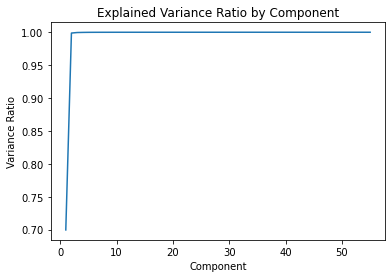

In [319]:
plt.title("Explained Variance Ratio by Component")
plt.plot(np.arange(1,56),explained_variance_ratio_cumul_sum2) #so that the first component is at 1, not 0
# plt.plot([1,10],[0.5,0.5])
plt.xlabel("Component")
plt.ylabel("Variance Ratio")
plt.show()

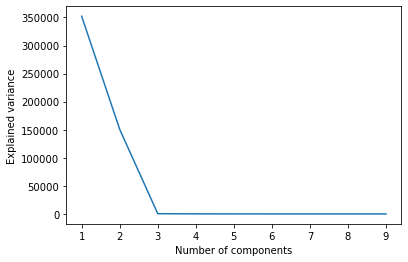

In [320]:
plt.plot(np.arange(1,10),pca2.explained_variance_[:9])
plt.xlabel("Number of components")
plt.ylabel("Explained variance")
plt.show()

In [321]:
# Loadings
loadings2=pd.DataFrame(pca2.components_[0:3,:].T).set_index(np.arange(1,56))
loadings2.columns = ['z1','z2','z3']
loadings2.index = df_ori.columns

,z1,z2,z3
DailyRate,-0.069194,9.976021e-01,-0.000136
Flag HR,0.000012,-5.831051e-05,-0.000983
Flag R&D,-0.000043,6.695323e-05,0.000526
DistanceFromHome,-0.000308,6.117112e-04,0.051177
EmployeeNumber,0.997602,6.919336e-02,-0.001419
EnvironmentSatisfaction,0.000028,1.634225e-04,-0.003699
HourlyRate,0.001428,1.930951e-04,0.998376
JobInvolvement,-0.000044,1.007473e-04,0.001772
Healthcare Representative Flag,0.000033,3.153523e-05,0.000589
Human Resources Flag,0.000012,-4.674749e-05,-0.000860


In [322]:
data_pca2 = pca2.fit_transform(df_ori)
df_pca2=pd.DataFrame()
df_pca2["Variable1"]=data_pca2[:, 0].reshape(-1)
df_pca2["Variable2"]=data_pca2[:, 1].reshape(-1)
df_pca2["Variable3"]=data_pca2[:, 2].reshape(-1)

In [323]:
df_pca2

,Variable1,Variable2,Variable3
0,437.437780,95.565181,19.134894
1,-793.764346,228.686981,-5.945025
2,725.123639,-511.988979,-6.567018
3,-975.010442,471.739424,-3.784494
4,-761.474051,543.692763,-0.950125
...,...,...,...
436,475.544513,-338.845991,-10.940045
437,-534.740104,-629.448471,9.269840
438,-609.228405,314.658404,20.184817
439,-157.051980,572.567911,-22.273514


#### K-means to determine the employee groups

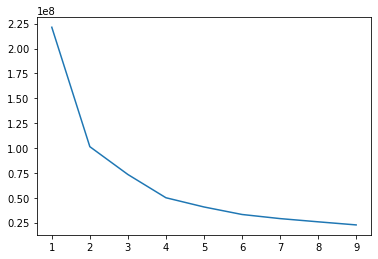

In [324]:
# K-means 
inertia_K=[]
K = range(1,10)
for k in K:
    kmeanModel = KMeans(n_clusters=k, random_state=666)
    kmeanModel.fit(df_pca2)
    inertia_K.append(kmeanModel.inertia_)
plt.plot(K,inertia_K)
plt.show()

In [325]:
kmeans = KMeans(n_clusters=8,random_state=666).fit(df_pca2)
kmeans.labels_

array([2, 1, 7, 1, 1, 5, 5, 1, 1, 1, 6, 4, 0, 1, 7, 2, 7, 0, 3, 2, 5, 1,
       4, 5, 2, 2, 0, 0, 6, 3, 7, 0, 0, 0, 2, 0, 4, 0, 1, 2, 3, 2, 2, 6,
       5, 1, 4, 5, 5, 4, 1, 3, 3, 4, 2, 6, 3, 2, 0, 7, 7, 6, 6, 0, 6, 3,
       1, 7, 1, 2, 7, 3, 5, 3, 6, 3, 7, 0, 4, 4, 6, 5, 7, 5, 4, 2, 2, 1,
       0, 3, 1, 3, 7, 5, 1, 1, 2, 1, 4, 1, 3, 0, 6, 6, 6, 0, 1, 2, 3, 5,
       2, 2, 6, 6, 1, 1, 1, 1, 2, 2, 6, 6, 6, 7, 5, 5, 6, 4, 5, 5, 7, 2,
       1, 0, 6, 4, 1, 5, 3, 0, 0, 5, 2, 1, 7, 2, 1, 4, 3, 3, 3, 4, 3, 3,
       6, 3, 2, 3, 4, 1, 2, 5, 7, 7, 2, 0, 3, 2, 1, 1, 1, 2, 2, 4, 1, 6,
       2, 3, 2, 7, 6, 5, 3, 2, 1, 5, 7, 1, 7, 0, 2, 1, 4, 7, 2, 4, 6, 0,
       2, 1, 5, 6, 4, 5, 0, 3, 3, 2, 2, 5, 4, 5, 2, 4, 7, 1, 3, 6, 5, 6,
       3, 1, 3, 4, 7, 6, 2, 2, 6, 0, 0, 1, 4, 2, 4, 4, 7, 6, 0, 1, 3, 4,
       0, 6, 5, 7, 1, 2, 1, 2, 4, 5, 3, 3, 7, 1, 1, 5, 6, 2, 5, 6, 2, 2,
       6, 0, 3, 1, 5, 7, 1, 2, 2, 3, 2, 2, 6, 5, 2, 2, 0, 3, 2, 4, 1, 7,
       4, 6, 5, 5, 5, 6, 1, 5, 4, 4, 1, 7, 7, 2, 4,

In [326]:
kmeans.cluster_centers_

array([[-9.36224013e+01, -6.24245385e-01, -1.50855629e+00],
       [-6.79550770e+02,  3.65447381e+02, -1.12849124e+00],
       [ 6.39875230e+02,  2.90526704e+02, -2.89648748e-02],
       [-7.66992061e+02, -2.27942347e+02,  5.32897260e+00],
       [ 3.58571886e+02, -4.08235826e+02,  2.67117818e+00],
       [-3.52524487e+02, -5.21635021e+02, -4.04536678e+00],
       [ 1.53199471e+02,  4.71035233e+02,  6.39302838e-01],
       [ 8.25117981e+02, -2.58827858e+02, -1.27043434e+00]])

#### Fit the results from K-means to the Excel document

In [327]:
df_adj = pd.read_excel('Starting_model.xlsx').iloc[:,:59]
labels = kmeans.labels_
# find the index of labels what equals to 0
index_0 = np.where(labels == 0)[0]
index_1 = np.where(labels == 1)[0]
index_2 = np.where(labels == 2)[0]
index_3 = np.where(labels == 3)[0]
index_4 = np.where(labels == 4)[0]
index_5 = np.where(labels == 5)[0]
index_6 = np.where(labels == 6)[0]
index_7 = np.where(labels == 7)[0]

In [329]:
names=  locals()
for ind,col in enumerate(["Severance Group 1","Severance Group 2","Severance Group 3","Severance Group 4","Severance Group 5","Severance Group 6","Severance Group 7","Severance Group 8"]):
    df_adj[col] =  np.nan
    df_adj[col][names[f"index_{ind}"]] = 1
    df_adj[col].fillna(0,inplace=True)

<ipython-input-329-172c7ad11eb6>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_adj[col][names[f"index_{ind}"]] = 1


## Question 5:

##### In your Solver model, define the severance cost for each employee (the current values are randomly generated), based on the case description.

ANSWER:

The severance cost for each employee depends on the years they have been working in the company. In this case, it is split into 2 situations, when they have been working less than 10 years in the company or more than 10 years. The way to compute their severance costs is different. 

In this case, as the objective of the company is to minimize the costs of the severance package, apart from the base package offering, we have consider to add 2 months salary on top of the initial package to those employees that have been working in the company for more than 10 years. Whereas for employees working less than 10 years, we have mantained the base package. 

Therefore, the severance cost for each employee would be:
- For employees who have been working on the company less than 10 years, the severance cost will the quarter of their monthly salary times the years they have been working in the company. 
- For employees who have been working in the company for more than 10 years, their severance cost will be computated as one third of their monthly income times the years they have been working, and adding as well 2 months of salary for their loyalty.

#### Computing the Severance cost for each employee

In [331]:
for ind, row in df_adj.iterrows():
    if row["TotalWorkingYears"] < 10:
        packages = row["MonthlyIncome"] /4 *row["TotalWorkingYears"]
        df_adj.loc[ind, "Severance Package"] = packages
    elif row["TotalWorkingYears"] >= 10:
        packages = row["MonthlyIncome"] /3*row["TotalWorkingYears"] + row["MonthlyIncome"] * 2
        df_adj.loc[ind, "Severance Package"] = packages

In [332]:
# df_adj.to_excel('Starting_model_m.xlsx', index=False)

## Question 6

##### Solve the optimization problem using Excel Solver. Be sure to note which groups are opened up to RCC, as well as the cost you achieve.

ANSWER:

In this case, after processing the optimization problem using Excel Solver with the constraints that were already given, we reached to the solution that Group 1, 2 , 5, 6 and 7 employees will be offered the RCC. The total cost by offering the severance packages to them is 979803,11 euros.

The solution of the optimization problem can be found in the Excel file called: Starting_model_before


## Question 7

##### The optimization problem is incomplete. Add the following two constraints: (i) The average yearly amount gained from salary cuts must be greater than the savings expected by management and found in part A; (ii) In each of the three departments, at least 80% of the employees have to stay on. With the additional constraints, solve the problem again. How do the decision variables and the objective change?

After adding the two constraints mentioned in the question and running the optimization problem again, we could perceive that the results have changed. The group of employees who will be given the RCC will be 1, 2, 3, 4, 7 and 8, in this case. By following the result obtained, the company would have a cost of 1411474,77 euros oon severance package.

By adding the new constraints, the number of employees that expect to be leaving are almost 48 people, in which the company will gain from the salary saving of 3078130,03 euros. 

The solution of the optimization problem can be found in the Excel file called: Starting_ model_after

In [333]:
df_adj= pd.read_excel('Starting_model.xlsx', index_col='Unnamed: 0').iloc[:,:59]

In [334]:
df_adj['Gender']

Unnamed: 0
0        Male
1      Female
2        Male
3        Male
4        Male
        ...  
436      Male
437      Male
438      Male
439    Female
440    Female
Name: Gender, Length: 441, dtype: object

## Question 8
 ##### Ensure that, given the optimal solution, whether an employee is offered an RCC is not implicitly linked to sensitive variables such as gender. Make sure you describe how you would verify this.

After having differentiate all the employees of the company into two clusters, the ones who will be given RCC and those that will not, we have to verify if between them there are possible discriminational issue when grouping. In this case, we have selected some senstive variables (age, gender, education level and marital status) and made some statistical comparisons between the different groups. 

First of all, we compute the mean of these features among the whole dataset, without any cluster, and also to the employees who will be offered RCC, in order to see if there are significant average differences between them. The results showed below indicate that there is no big average difference between them in terms of these sesitive variables. The proportion of gender, education level and marital status of the group of employees with RCC are close to the general proportion of the whole company. 

Another method used to further support the argument of not proceeding a discriminational grouping, we have done the Anova test between the two groups of employees, the ones offered RCC and the ones that do not, according to each of the variables. We could perceive that there was no significant difference between the two groups of employees, since the p-values of each test was larger than 5%. Therefore, the results obtained from the tests reinforce the fact that there was not discriminational clustering when deciding to whom offer the RCC. 

In [335]:
df_comp = df_adj[['Age', 'MaritalStatus','Gender','Education','RCC offered']]
df_comp.dropna(inplace=True)
df_comp = pd.get_dummies(data= df_comp, columns=['Gender', 'MaritalStatus'], drop_first=True)
df_comp.mean()

/Users/xiawang/opt/anaconda3/envs/DT/lib/python3.8/site-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


Age                      37.945170
Education                 2.976501
RCC offered               0.650131
Gender_Male               0.590078
MaritalStatus_Married     0.438642
MaritalStatus_Single      0.339426
dtype: float64

In [336]:
df_comp.mean()

Age                      37.945170
Education                 2.976501
RCC offered               0.650131
Gender_Male               0.590078
MaritalStatus_Married     0.438642
MaritalStatus_Single      0.339426
dtype: float64

In [337]:
df_0 = df_comp[(df_comp['RCC offered'] == 0)]
df_1 = df_comp[(df_comp['RCC offered'] == 1)]

In [338]:
df_comp.dropna(inplace=True)
df_comp = df_comp.groupby('RCC offered').mean()
df_comp

,Age,Education,Gender_Male,MaritalStatus_Married,MaritalStatus_Single
RCC offered,,,,,
0,38.037313,2.917910,0.641791,0.425373,0.313433
1,37.895582,3.008032,0.562249,0.445783,0.353414


In [339]:
df_0.dropna(inplace=True)
df_1.dropna(inplace=True)

In [340]:
from scipy.stats import f_oneway
f_oneway(df_0['Age'],df_1['Age'])

F_onewayResult(statistic=0.022354462678290284, pvalue=0.8812271046950337)

In [341]:
f_oneway(df_0['Gender_Male'],df_1['Gender_Male'])

F_onewayResult(statistic=2.280374533380118, pvalue=0.13184909495803765)

In [342]:
f_oneway(df_0['MaritalStatus_Married'],df_1['MaritalStatus_Married'])

F_onewayResult(statistic=0.14666769402899654, pvalue=0.701953963338776)

In [343]:
f_oneway(df_0['MaritalStatus_Single'],df_1['MaritalStatus_Single'])

F_onewayResult(statistic=0.6188329635010555, pvalue=0.43197031762028015)

## Question 9:

##### Discuss possible pros and cons of the optimization approach. What are the assumptions you are making implicitly, and how likely are they to be fulfilled?


In terms of proceeding the optimization approach through Excel Solver, there are some pros and cons that we have to take into account:

- Pros:
1. The result of the optimization process can be obtained fastly and solutions are highly reliable.
2. The computation process is easy to manage, does not require any specific skills.
3. It is a data-driven method which provide objective results that are easier to convince people within a business managerial situation. 

- Cons:
1. It is not suitable for large dataset, since the computational process might take long time to reach to a solution. 
2. We can only obtain a single objective result in one optimization problem. In case, we want to achieve at the same time two objectives, we have to do it separetely. 
3. Only takes into account numerical data, which sometimes, not all the problems are based on numerical inputs. 

The assumptions of the problem:
1. All the employees who will be given the RCC will accept it, which cannnot be 100% always the truth, since it depends on the decision of each employees.
2. The missing values we have filled during the analysis process are assumed to be similar to their real values, which is not always the case, since it would depend on the accuracy of the model. 
3. The data we have collected from the employees are still true, assuming that they have not changed any of the features nor opinions. Individuals could have changed their mind afterwards, especially for those self- reported questions.
4. There is a linear relationship between the variables, which might not always be the case. 